# Heart Disease Prediction Using Machine Learning

## Import Libraries

In [64]:
# To Handle the data
import numpy as np
import pandas as pd

# To Viusalize the data
import matplotlib.pyplot as plt
import seaborn as sns

# To preprocess the data
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.model_selection import train_test_split

# To Train model
from sklearn.linear_model import LogisticRegression

# Model Evalution-Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [65]:
# Import dataset
df = pd.read_csv("/content/heart.csv")

In [66]:
# Display any 5 sample rows from dataset
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
488,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
348,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0
300,46,0,1,105,204,0,1,172,0,0.0,2,0,2,1
100,43,0,2,122,213,0,1,165,0,0.2,1,0,2,1
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1


# Data Attributes


---
1. **Age**: The age of the patient in years.
2. **Sex**: Gender of the patient (1 = male, 0 = female).
3. **Chest Pain Type (4 values)**:
   - 0: Typical angina
   - 1: Atypical angina
   - 2: Non-anginal pain
   - 3: Asymptomatic
4. **Resting Blood Pressure**: The resting blood pressure in mm Hg.
5. **Serum Cholesterol in mg/dl**: The amount of cholesterol in the blood.
6. **Fasting Blood Sugar > 120 mg/dl**: Indicates if fasting blood sugar is greater than 120 mg/dl (1 = true, 0 = false).
7. **Resting Electrocardiographic Results (values 0,1,2)**:
This column gives you insights into the electrical health of the patient's heart at rest.
   - 0: Normal
   - 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
   - 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **Maximum Heart Rate Achieved**: The maximum heart rate achieved during exercise.
9. **Exercise Induced Angina**: Exercise-induced angina (1 = yes, 0 = no).
10. **Oldpeak**: ST depression induced by exercise relative to rest.
11. **Slope of the Peak Exercise ST Segment**:
   - 0: Upsloping
   - 1: Flat
   - 2: Downsloping
12. **Number of Major Vessels (0-3) Colored by Fluoroscopy**:This column indicates the number of major blood vessels that showed signs of blockage or narrowing during a fluoroscopy procedure.
  - 0: No major vessels colored/blocked
  - 1: One major vessel colored/blocked
  - 2: Two major vessels colored/blocked
  - 3: Three major vessels colored/blocked
  - 4: Four major vessels colored/blocked
13. **Thal**:
   - 0: Normal
   - 1: Fixed defect
   - 2: Reversible defect





## Data Information

In [67]:
df.shape

(1025, 14)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [69]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Missing values

In [70]:
# Check for missing values
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


## Columns Analyzation

### Age column

In [71]:
# summerize the age column
df['age'].describe()

,age
count,1025.000000
mean,54.434146
std,9.072290
min,29.000000
25%,48.000000
50%,56.000000
75%,61.000000
max,77.000000


<Axes: xlabel='age', ylabel='Count'>

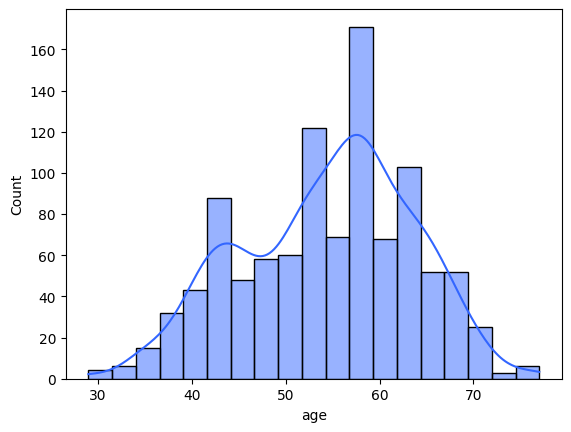

In [72]:
# Plot the histogram for 'age' column
sns.histplot(df['age'], kde=True, color="#3366FF")

In [73]:
# Printing Mean and Median of Age column
print('Mean = ', df['age'].mean())
print('Median = ', df['age'].median())

Mean =  54.43414634146342
Median =  56.0


### sex column

In [74]:
# Find the values of sex column
# 1 = male , 0 = female
df['sex'].value_counts()

,count
sex,
1,713
0,312


In [75]:
# calculating the percentage fo male and female value counts in the data

male_count = 713
female_count = 312

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage : {male_percentage:.2f}%')
print(f'Female percentage : {female_percentages:.2f}%')

Male percentage : 69.56%
Female percentage : 30.44%


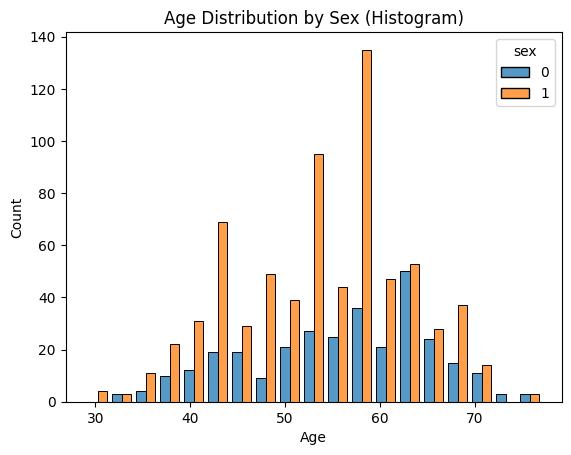

In [76]:
# Histogram : Shows the distribution of ages for each sex.
sns.histplot(data=df, x='age', hue='sex', multiple="dodge", shrink=.8)
plt.title('Age Distribution by Sex (Histogram)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Chest Pain Type - 'cp' column

In [77]:
# Find the values of cp column
"""
0: Typical angina
1: Atypical angina
2: Non-anginal pain
3: Asymptomatic
"""
df['cp'].value_counts()

,count
cp,
0,497
2,284
1,167
3,77


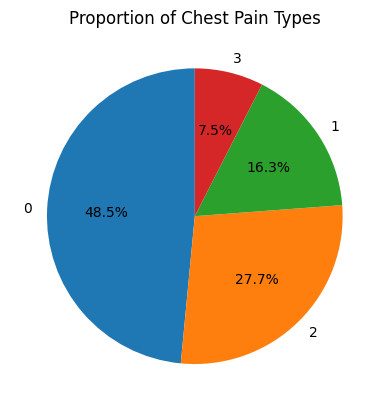

In [78]:
# Pie-chart : To display Proportion of Chest Pain Types
cp_counts = df['cp'].value_counts()
plt.pie(cp_counts, labels=cp_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Chest Pain Types')
plt.show()

### Blood Pressure - 'trestbps' Column

The normal resting blood pressure is 120/80 mm Hg.

In [79]:
# summerize the trestbps column
df['trestbps'].describe()

,trestbps
count,1025.000000
mean,131.611707
std,17.516718
min,94.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


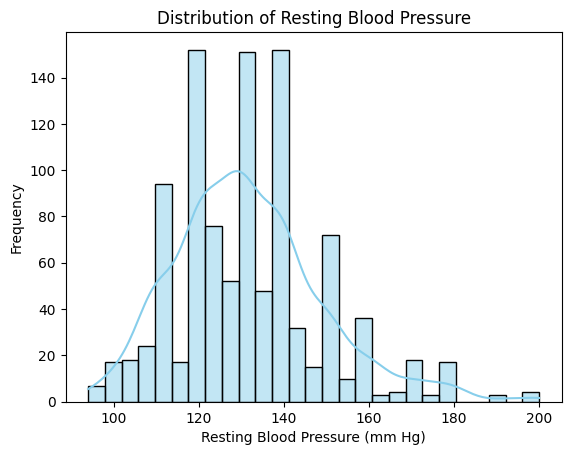

In [80]:
# Histogram : To Visualize Distribution of Resting Blood Pressure
sns.histplot(df['trestbps'], kde=True, color="skyblue")
plt.title('Distribution of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.ylabel('Frequency')
plt.show()

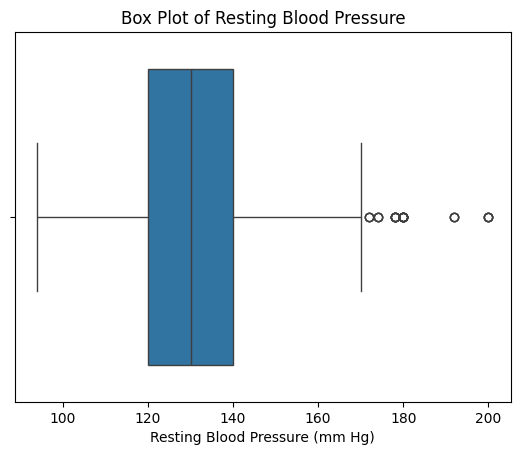

In [107]:
# Box plot to detect outliers
sns.boxplot(x=df['trestbps'])
plt.title('Box Plot of Resting Blood Pressure')
plt.xlabel('Resting Blood Pressure (mm Hg)')
plt.show()

### Serum Cholesterol - 'chol' column

In [81]:
# summerize the Cholesterol column
df['chol'].describe()

,chol
count,1025.00000
mean,246.00000
std,51.59251
min,126.00000
25%,211.00000
50%,240.00000
75%,275.00000
max,564.00000


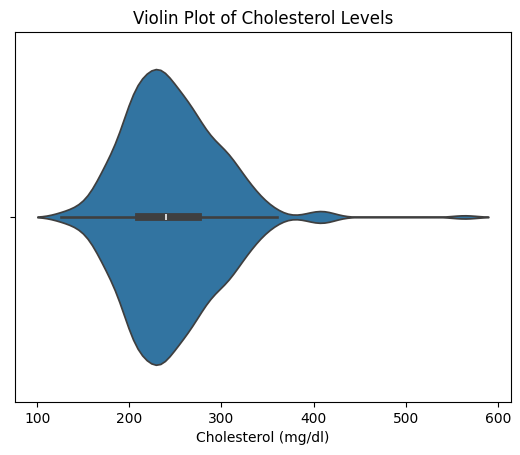

In [82]:
# Plot Violin plot for Cholesterol levels
sns.violinplot(x=df['chol'])
plt.title('Violin Plot of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dl)')
plt.show()

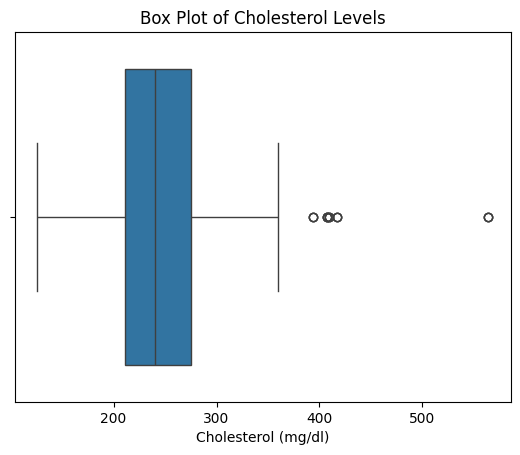

In [106]:
# Box plot to detect outliers
sns.boxplot(x=df['chol'])
plt.title('Box Plot of Cholesterol Levels')
plt.xlabel('Cholesterol (mg/dl)')
plt.show()

### Fasting Blood Sugar - 'fbs' column

Fasting Blood Sugar > 120 mg/dl ; (True = 1 ),(False = 0)


In [83]:
# count the value for patient who has blood suger > 120 mg/dl
df['fbs'].value_counts()

,count
fbs,
0,872
1,153


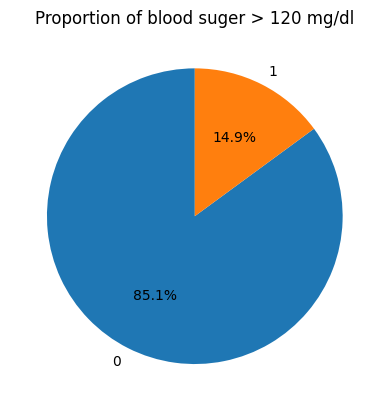

In [84]:
# Pie-chart to plot blood suger
fbs_counts = df['fbs'].value_counts()
plt.pie(fbs_counts, labels=fbs_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of blood suger > 120 mg/dl')
plt.show()

### Resting Electrocardiographic Results - 'restecg' column

In [85]:
# Count the value for Resting Electrocardiographic Results
df['restecg'].value_counts()

,count
restecg,
1,513
0,497
2,15


### Maximum Heart Rate Achieved - 'thalach' Column

Calculation Maximum heart rate = 220 - age.

In [86]:
# Discribe the 'thalach' Column
df['thalach'].describe()

,thalach
count,1025.000000
mean,149.114146
std,23.005724
min,71.000000
25%,132.000000
50%,152.000000
75%,166.000000
max,202.000000


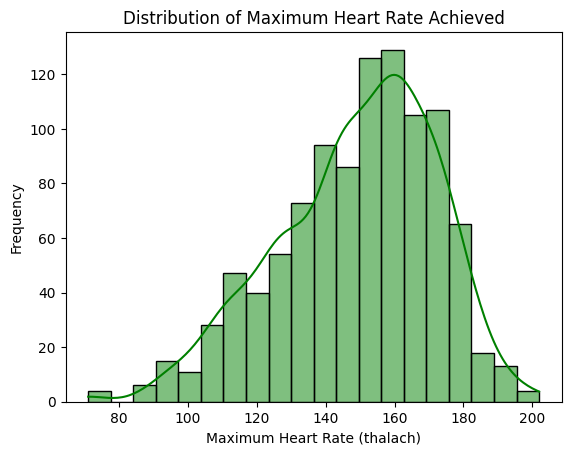

In [87]:
# Plot the histogram for 'thalach' column
sns.histplot(df['thalach'], kde=True, color="green")
plt.title('Distribution of Maximum Heart Rate Achieved')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Frequency')
plt.show()

### exang and oldpeak in simple words :

* exang: Does your chest hurt when you exercise? (True = 1/False = 0)
* oldpeak: If yes, how much does your heart's electrical signal change during exercise? (A number indicating the severity)(float)




### Exercise Induced Angina - 'exang' Column

In [88]:
# Count value for exang' Column
df['exang'].value_counts()

,count
exang,
0,680
1,345


### Oldpeak Column

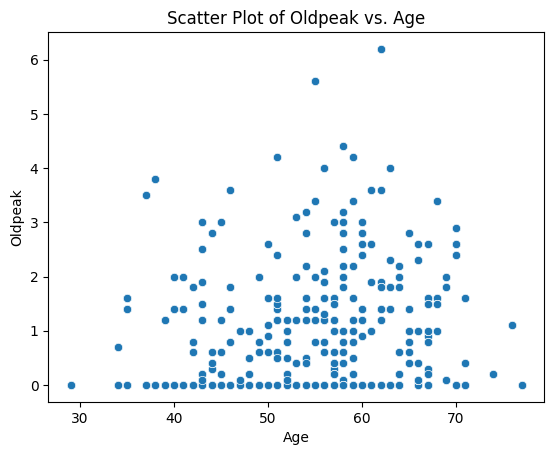

In [89]:
# Scattter Plot to Visualize Relation Betwee age and oldpeak
sns.scatterplot(x='age', y='oldpeak', data=df)
plt.title('Scatter Plot of Oldpeak vs. Age')
plt.xlabel('Age')
plt.ylabel('Oldpeak')
plt.show()

### Slope of the Peak Exercise ST Segment - 'slope' Column

In [90]:
# value count for slope' Column
df['slope'].value_counts()

,count
slope,
1,482
2,469
0,74


### Number of Major Vessels (0-4) - 'ca' Column

In [91]:
# value count for 'ca' column
df['ca'].value_counts()

,count
ca,
0,578
1,226
2,134
3,69
4,18


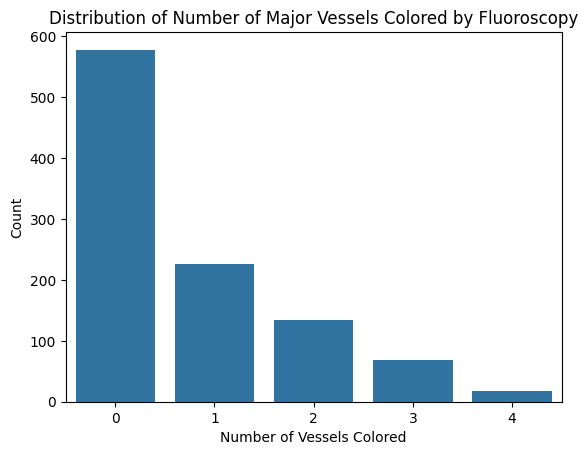

In [92]:
# To Visualize Number of Major Vessels - countplot
sns.countplot(x='ca', data=df)
plt.title('Distribution of Number of Major Vessels Colored by Fluoroscopy')
plt.xlabel('Number of Vessels Colored')
plt.ylabel('Count')
plt.show()

### Thal Column

In [93]:
# value count for 'thal' column
df['thal'].value_counts()

,count
thal,
2,544
3,410
1,64
0,7


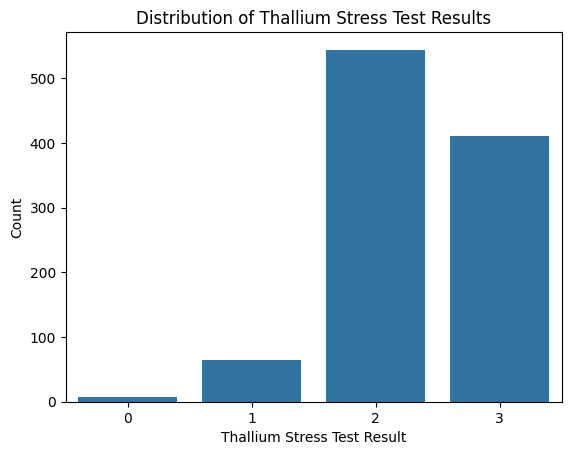

In [94]:
# To Visualize data of 'thal' column - countplot
sns.countplot(x='thal', data=df)
plt.title('Distribution of Thallium Stress Test Results')
plt.xlabel('Thallium Stress Test Result')
plt.ylabel('Count')
plt.show()

## Exploratory Data Analysis (EDA)

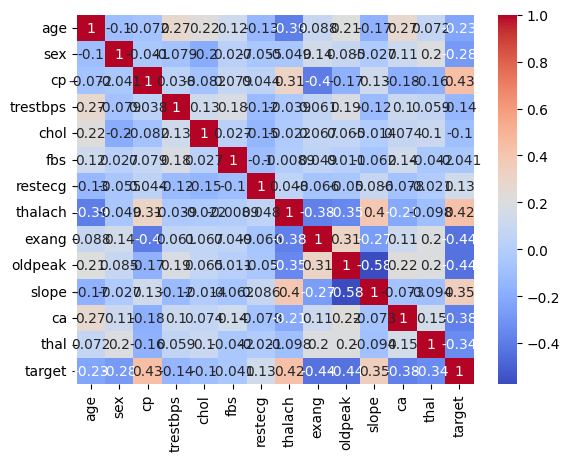

In [95]:
# Correlation heatmap
# red = positive value , blue = negetive value
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

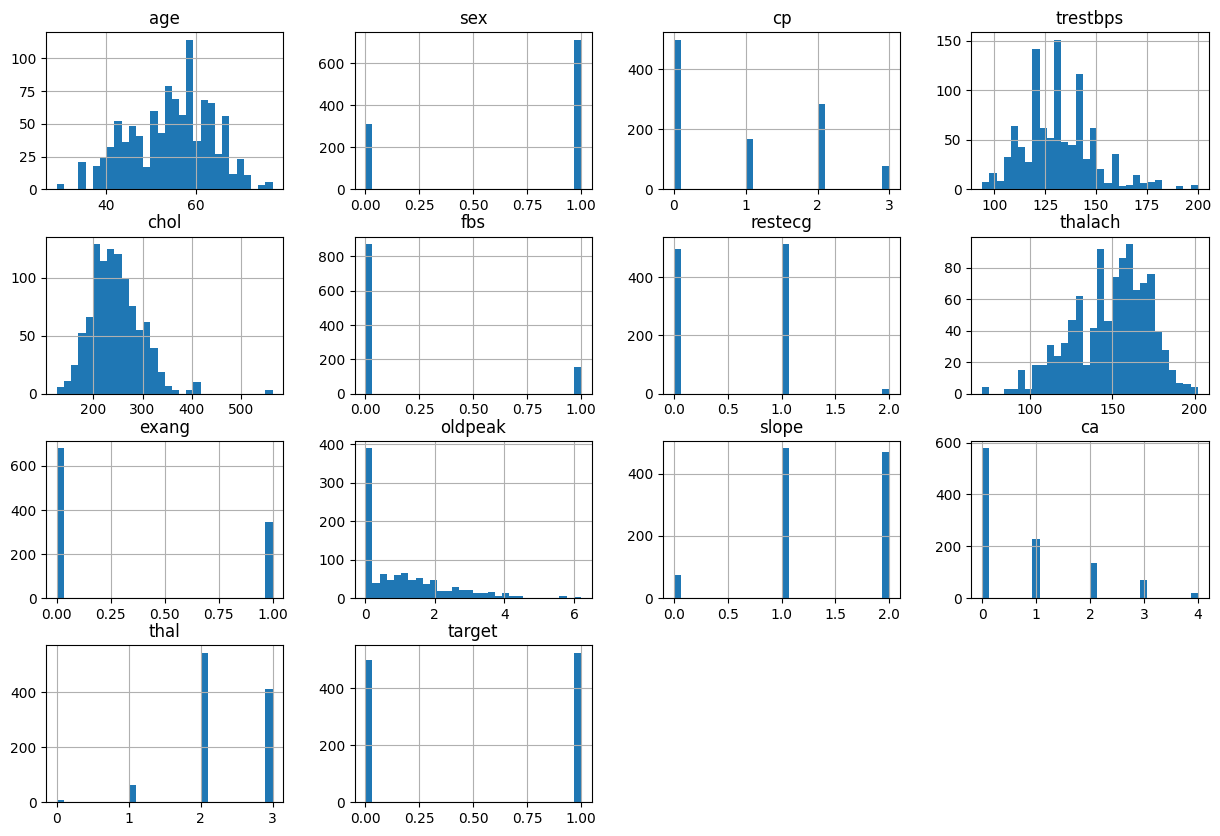

In [96]:
# Distribution of numerical features
df.hist(bins=30, figsize=(15, 10))
plt.show()

## EDA Summary

1. **Data Distribution**:
The dataset is balanced with respect to the target variable (heart disease presence).
2. **Missing Values**:
No significant missing values were found, ensuring data completeness.
3. **Feature Correlation**:
Key features like cholesterol, max heart rate, and age showed strong correlations with heart disease.
4. **Outliers**:
Outliers in features such as cholesterol and blood pressure were identified and handled.
5. **Feature Distributions**:
Numerical features were visualized to understand their distributions and central tendencies.
6. **Categorical Features**:
Categorical features were analyzed to understand their frequency distributions.
7. **Data Scaling**:
Standardization was applied to numerical features for uniformity.

These insights guided the feature engineering and model building processes, contributing to the development of an effective heart disease prediction model.

## Train-Test Split

In [97]:
y = df["target"]  # target value
X = df.drop('target',axis=1)  # features value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0) # Divide data by 80-20% in train and test

In [98]:
X.shape

(1025, 13)

In [99]:
y.shape

(1025,)

## Data Preprocessing-Standardization

In [100]:
# Data Scaling and Transforming
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model Building and Training

In [101]:
# Logistic Regression
m1 = 'Logistic Regression'
lr = LogisticRegression()

In [102]:
# Model Training
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)

## Model Performance Evaluation

In [103]:
# Evaluation using Confusion Matrix and Accuracy Score
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)

confussion matrix
[[ 77  21]
 [  7 100]]


In [104]:
# Accuracy of Model using Logistic Regression
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')

Accuracy of Logistic Regression: 86.34146341463415 



In [105]:
# Classification Report - precicion, recall, f1-score, support
print(classification_report(y_test,lr_predict))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83      0.93      0.88       107

    accuracy                           0.86       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.86      0.86       205



## Conclusion

---



In this project, I successfully developed a machine learning model to predict heart disease using various patient health metrics. The steps involved in this process included:

1. **Data Handling**: Imported and handled the data using libraries such as NumPy and pandas.
2. **Data Visualization**: Visualized the data using Matplotlib and Seaborn to understand the distributions and relationships between features.
3. **Data Preprocessing**: Preprocessed the data using techniques like standardization to ensure that all features contribute equally to the model.
4. **Model Training**: Split the data into training and testing sets and trained a Logistic Regression model.
5. **Model Evaluation**: Evaluated the model using appropriate metrics to ensure its accuracy and reliability.

The insights gained from the Exploratory Data Analysis (EDA) were crucial in guiding the feature engineering and model building steps. The final model demonstrated good performance in predicting heart disease, which can be further improved with more advanced techniques and hyperparameter tuning.

Overall, this project highlights the importance of data preprocessing, visualization, and model evaluation in developing a robust machine learning model for heart disease prediction.
